# Escenarios experimentales Internetworking CNN ESCENARIO B
Presentado por: Jonathan Toapanta
Fecha: 23/02/2023


In [ ]:
!pip install tensorflow-addons

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.4 MB/s eta 0:00:00


In [ ]:
# Load the data
url = 'https://raw.githubusercontent.com/jonathan-elian-toapanta/INTERNETWORKING/main/ESCENARIOS/ScenarioB.csv'
df = pd.read_csv(url)
df= pd.read_csv(url,low_memory=False)
dataframe= pd.read_csv(url,low_memory=False)

In [ ]:
# Normalise the data
def dfNormalize(df):
    for feature_name in df.columns:
        df.loc[:,feature_name]= pd.to_numeric(df.loc[:,feature_name], errors='coerce').fillna(0)
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()   
        if (max_value - min_value) > 0:
            df.loc[:,feature_name] = (df.loc[:,feature_name] - min_value) / (max_value - min_value)
        else:
            df.loc[:,feature_name] = (df.loc[:,feature_name]- min_value)    
    return df


In [ ]:
# Split the data into train and test sets
y = df['label']
label_map = {'AUDIO': 0, 'BROWSING': 1, 'CHAT': 2, 'FILE-TRANSFER' : 3, 'MAIL' : 4, 'P2P' : 5, 'VIDEO' : 6, 'VOIP' : 7}
change_labels = lambda x: label_map[x] if x in label_map else -1
y = df['label'].apply(change_labels)


In [ ]:
X = df.iloc[:, 4:-1]
X = dfNormalize(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Reshape the data for Conv1D
X_train = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))


# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# Define the model
model = keras.models.Sequential([
    keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    keras.layers.MaxPool1D(pool_size=2),
    keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu'),
    keras.layers.MaxPool1D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(8, activation='softmax')
])

In [ ]:
from tensorflow.keras.metrics import Precision, Recall
from tensorflow_addons.metrics import F1Score

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', 
              metrics=['accuracy', Precision(), Recall(), F1Score(num_classes=8, average='macro')])


In [ ]:
# Set up EarlyStopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=5)

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/10


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


202/202 [==============================] - 9s 28ms/step - loss: 1.5977 - accuracy: 0.4113 - precision: 0.5546 - recall: 0.1428 - f1_score: 0.1804 - val_loss: 1.4154 - val_accuracy: 0.4580 - val_precision: 0.6077 - val_recall: 0.2753 - val_f1_score: 0.1787
Epoch 2/10
202/202 [==============================] - 6s 27ms/step - loss: 1.4084 - accuracy: 0.4628 - precision: 0.6357 - recall: 0.2272 - f1_score: 0.2231 - val_loss: 1.3114 - val_accuracy: 0.5071 - val_precision: 0.6305 - val_recall: 0.3033 - val_f1_score: 0.2625
Epoch 3/10
202/202 [==============================] - 5s 23ms/step - loss: 1.3134 - accuracy: 0.5116 - precision: 0.7080 - recall: 0.2936 - f1_score: 0.2925 - val_loss: 1.1804 - val_accuracy: 0.5507 - val_precision: 0.7239 - val_recall: 0.3667 - val_f1_score: 0.3249
Epoch 4/10
202/202 [==============================] - 5s 24ms/step - loss: 1.2044 - accuracy: 0.5804 - precision: 0.7610 - recall: 0.3518 - f1_score: 0.3807 - val_loss: 1.0609 - val_accuracy: 0.6582 - val_preci

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy, test_precision, test_recall, test_f1 = model.evaluate(X_test, y_test)

# Print the test set metrics
print('Test set metrics:')
print('  Loss:     {:.3f}'.format(test_loss))
print('  Accuracy: {:.3f}'.format(test_accuracy))
print('  Precision:{:.3f}'.format(test_precision))
print('  Recall:   {:.3f}'.format(test_recall))
print('  F1 Score: {:.3f}'.format(test_f1))


51/51 [==============================] - 0s 5ms/step - loss: 0.8783 - accuracy: 0.6967 - precision: 0.8286 - recall: 0.5438 - f1_score: 0.4976
Test set metrics:
  Loss:     0.878
  Accuracy: 0.697
  Precision:0.829
  Recall:   0.544
  F1 Score: 0.498


# RANDOM FOREST

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.utils import to_categorical

In [ ]:
# Load the data
url = 'https://raw.githubusercontent.com/jonathan-elian-toapanta/INTERNETWORKING/main/ESCENARIOS/ScenarioB.csv'
df = pd.read_csv(url)
df= pd.read_csv(url,low_memory=False)
dataframe= pd.read_csv(url,low_memory=False)

In [ ]:

# Normalise the data
def dfNormalize(df):
    for feature_name in df.columns:
        df.loc[:,feature_name]= pd.to_numeric(df.loc[:,feature_name], errors='coerce').fillna(0)
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()   
        if (max_value - min_value) > 0:
            df.loc[:,feature_name] = (df.loc[:,feature_name] - min_value) / (max_value - min_value)
        else:
            df.loc[:,feature_name] = (df.loc[:,feature_name]- min_value)    
    return df

In [ ]:
# Split the data into train and test sets
y = df['label']
label_map = {'AUDIO': 0, 'BROWSING': 1, 'CHAT': 2, 'FILE-TRANSFER' : 3, 'MAIL' : 4, 'P2P' : 5, 'VIDEO' : 6, 'VOIP' : 7}
change_labels = lambda x: label_map[x] if x in label_map else -1
y = df['label'].apply(change_labels)

X = df.iloc[:, 4:-1]
X = dfNormalize(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Create a Random Forest classifier with 100 trees
rfc = RandomForestClassifier(n_estimators=100, random_state=42)


In [ ]:
# Train the model on the training data
rfc.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rfc.predict(X_test)


In [ ]:

# Calculate the accuracy, precision, recall, and f1-score of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [ ]:
# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.8384089496581728
Precision: 0.8384859582948729
Recall: 0.8384089496581728
F1-Score: 0.8339501085075295


In [ ]:
# Resultados del modelo CNN
cnn_results = [test_loss, test_accuracy, test_precision, test_recall, test_f1]

# Resultados del modelo Random Forest
rf_results = [accuracy, precision, recall, f1]

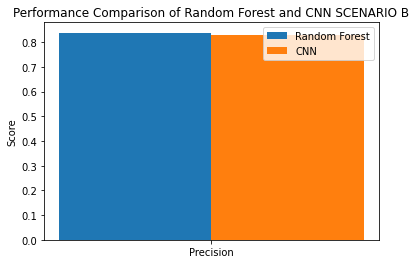

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics and their scores
metrics = ['Precision']
rf_scores = [precision]
cnn_scores = [test_precision]

# Set the bar width
bar_width = 0.35

# Set the positions of the bars
bar_positions_rf = np.arange(len(metrics))
bar_positions_cnn = bar_positions_rf + bar_width

# Create the bar plots
plt.bar(bar_positions_rf, rf_scores, width=bar_width, label='Random Forest')
plt.bar(bar_positions_cnn, cnn_scores, width=bar_width, label='CNN')

# Add labels and title
plt.xticks(bar_positions_rf + bar_width / 2, metrics)
plt.ylabel('Score')
plt.title('Performance Comparison of Random Forest and CNN SCENARIO B')

# Add legend and show the plot
plt.legend()
plt.show()

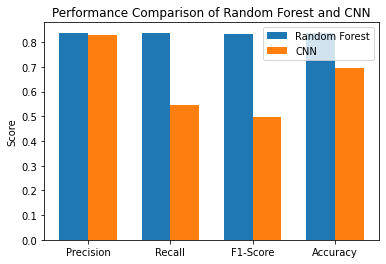

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics and their scores
metrics = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
rf_scores = [precision, recall, f1, accuracy]
cnn_scores = [test_precision, test_recall, test_f1, test_accuracy]

# Set the bar width
bar_width = 0.35

# Set the positions of the bars
bar_positions_rf = np.arange(len(metrics))
bar_positions_cnn = bar_positions_rf + bar_width



# Create the bar plots
plt.bar(bar_positions_rf, rf_scores, width=bar_width, label='Random Forest')
plt.bar(bar_positions_cnn, cnn_scores, width=bar_width, label='CNN')

# Add labels and title
plt.xticks(bar_positions_rf + bar_width / 2, metrics)
plt.ylabel('Score')
plt.title('Performance Comparison of Random Forest and CNN')

# Add legend and show the plot
plt.legend()
plt.show()